In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("News.csv",index_col=0)
data

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [3]:
data.shape

(44919, 5)

In [4]:
data=data.drop(["title","subject","date"],axis=1)

In [5]:
data

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [6]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [7]:
data=data.sample(frac=1)

In [8]:
data.reset_index(inplace=True)

In [9]:
data=data.drop("index",axis=1)

In [10]:
data

,text,class
0,WASHINGTON (Reuters) - U.S. Secretary of State...,1
1,MADRID (Reuters) - Spain s government is ready...,1
2,Satellite service DirecTV is refunding NFL Sun...,0
3,Your tax dollars up in smoke thanks to the USD...,0
4,KABUL (Reuters) - Gunmen disguised as police k...,1
...,...,...
44914,When the Black Lives Matter movement started g...,0
44915,PHNOM PENH (Reuters) - Cambodia s government h...,1
44916,"VLADIVOSTOK, Russia (Reuters) - Russian Presid...",1
44917,This is a story about how once trusted mainstr...,0


<Axes: xlabel='class', ylabel='count'>

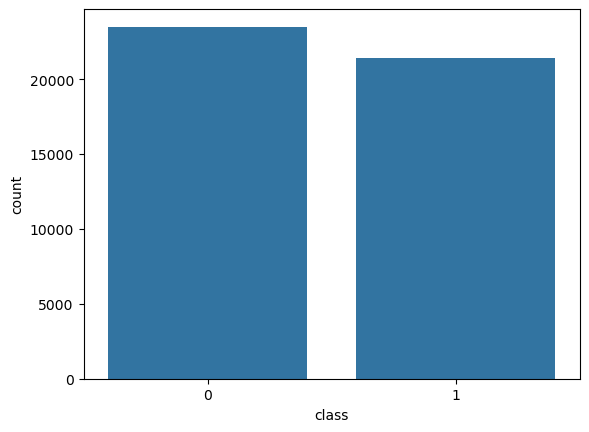

In [11]:
sns.countplot(data=data,x="class",order=data["class"].value_counts().index)

In [12]:
from tqdm import tqdm
import re
import nltk
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
def preprocess_text(text_data):
    preprocessed_data=[]

    for sentence in tqdm(text_data):
        sentence=re.sub(r'[^\w\s]'," ",sentence)
        preprocessed_data.append(" ".join(token.lower() for token in str(sentence).split() if token not in stopwords.words("english")))
    return preprocessed_data

In [14]:
preprocessed_review=preprocess_text(data["text"].values)
data["text"]=preprocessed_review

100%|██████████████████████████████████████████████████████████████████████████| 44919/44919 [3:01:10<00:00,  4.13it/s]


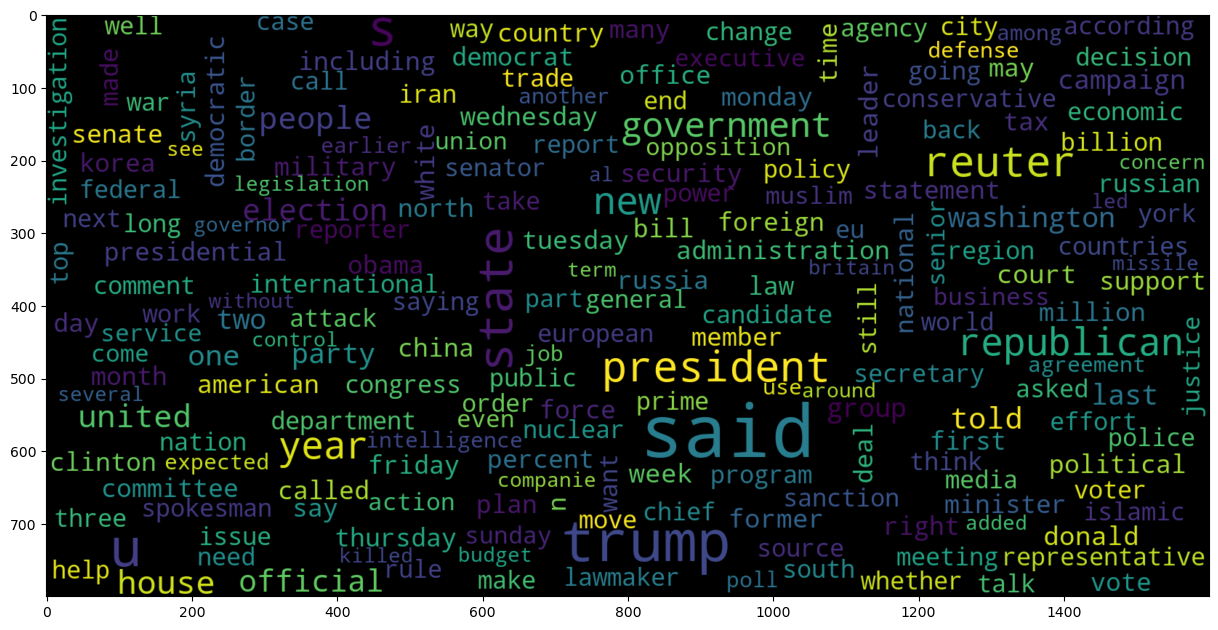

In [19]:
consolidated=" ".join(words for words in data["text"][data["class"]==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=100,collocations=False)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation="bilinear")
plt.show()

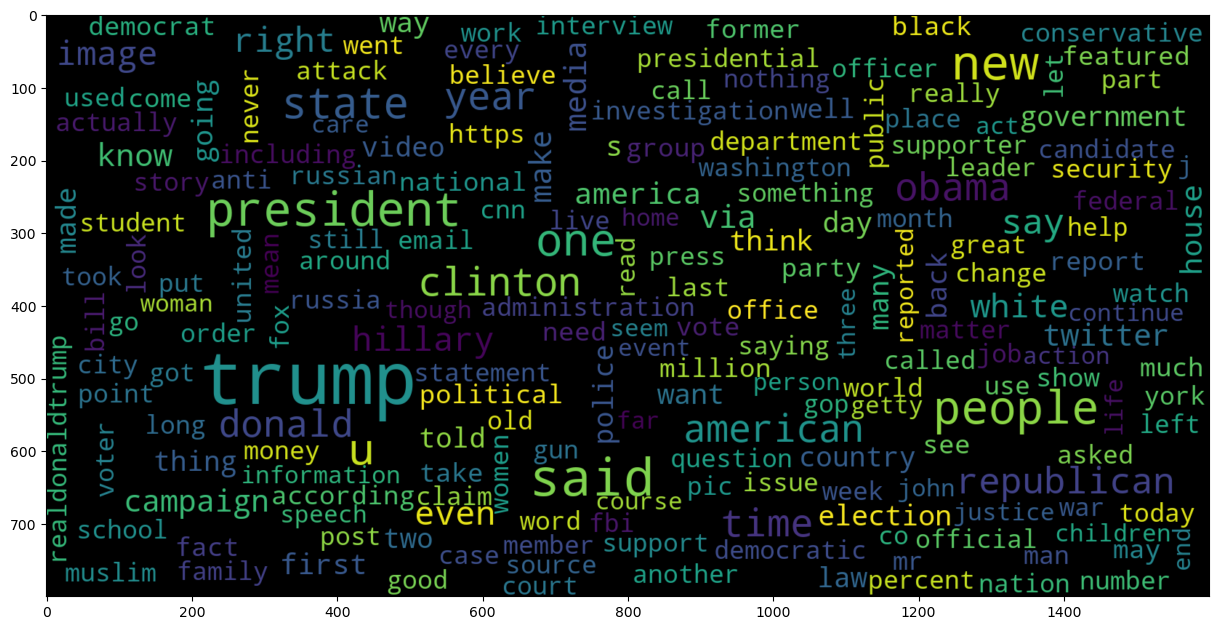

In [27]:
consolidated=" ".join(word for word in data["text"][data["class"]==0].astype(str))
wordCount=WordCloud(width=1600,height=800,random_state=21,max_font_size=100,collocaions=False)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation="bilinear")
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

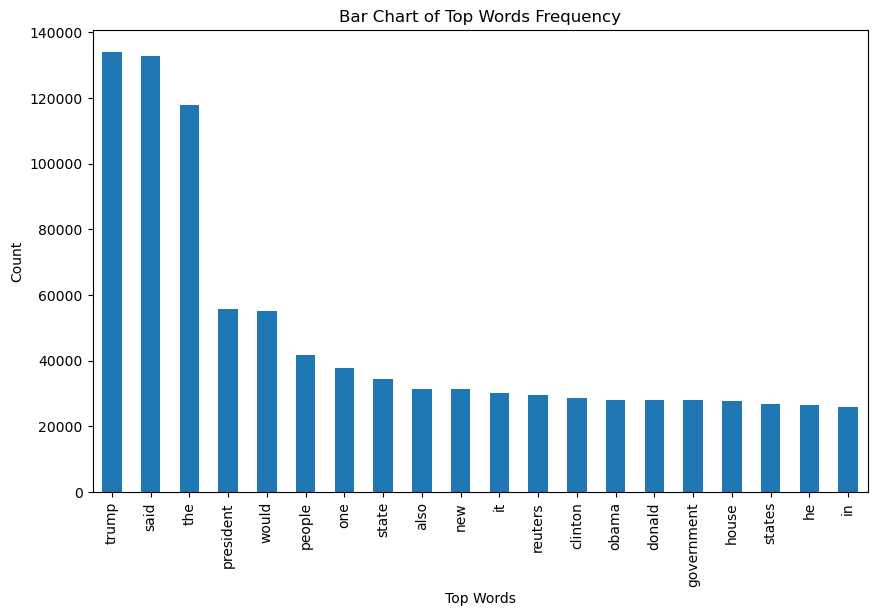

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus,n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words=vec.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
    return words_freq[:n]

common_words=get_top_n_words(data["text"],20)
df1=pd.DataFrame(common_words,columns=["review","count"])


df1.groupby('review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(data["text"],data["class"],test_size=0.25)


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

In [45]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [47]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9999703167205913
0.9960819234194123


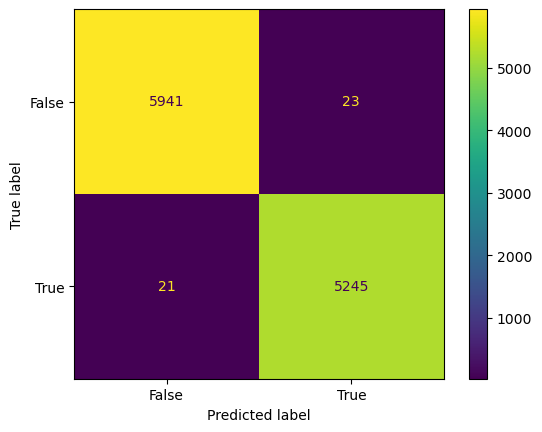

In [51]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()